In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog

In [2]:
print("Opening a dialog box to choose your dataset folder...")
root = tk.Tk()
root.withdraw() # Hide the small empty window

# Open the folder selection dialog
DATASET_DIR = filedialog.askdirectory(title="Please select your 'FINAL DATASET' folder")

# Check if the user cancelled the dialog
if not DATASET_DIR:
    print("No folder selected. Exiting the program.")
    exit()

print(f"Selected Folder: {DATASET_DIR}")

Opening a dialog box to choose your dataset folder...
Selected Folder: C:/Users/Jay Surieya/Downloads/FINAL DATASET


Found 59903 images belonging to 110 classes.

Generator created successfully!
Found 59903 images belonging to 110 classes.

Shape of one batch of images: (32, 300, 300, 3)


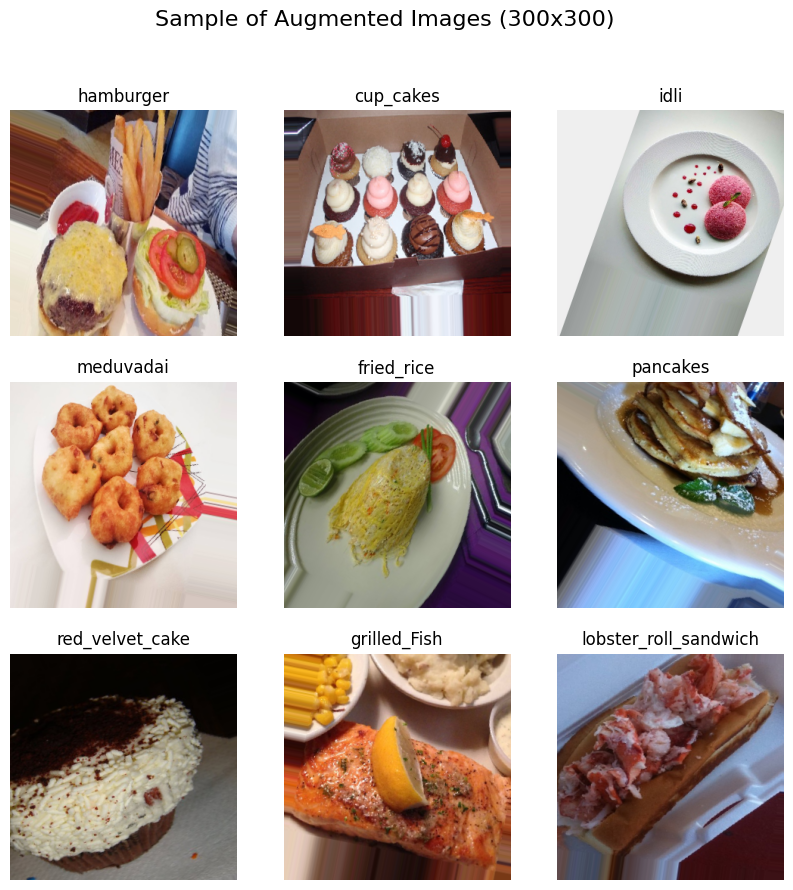

In [3]:
IMAGE_SIZE = (300, 300)
BATCH_SIZE = 32

# --- 3. Setup the Augmentation Generator ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# --- 4. Create the Generator from the CHOSEN Directory ---
train_generator = train_datagen.flow_from_directory(
    directory=DATASET_DIR, # Uses the path you selected
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# --- 5. (Optional) Visualize the Output ---
print("\nGenerator created successfully!")
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

image_batch, label_batch = next(train_generator)
print(f"\nShape of one batch of images: {image_batch.shape}")

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    class_index = np.argmax(label_batch[i])
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis("off")
plt.suptitle("Sample of Augmented Images (300x300)", fontsize=16)
plt.show()

In [7]:
import tensorflow as tf

# --- Assume `train_generator` and its parameters are already defined ---
NUM_CLASSES = train_generator.num_classes
IMAGE_SIZE = (300, 300)

# --- 1. Load the Pre-trained Base Model ---
base_model = tf.keras.applications.EfficientNetB3(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

# --- 2. Freeze the Base Model ---
base_model.trainable = False

# --- 3. Build the Model using the Sequential API ---
# This is a cleaner way to stack layers in order.
model = tf.keras.Sequential([
    # The input layer matches the base model's expectations
    tf.keras.Input(shape=IMAGE_SIZE + (3,)), 
    
    # The pre-trained base model
    base_model,
    
    # The custom classification head
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


print("Model built successfully using the Sequential API!")
model.summary()

ValueError: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 40). Received saved weight with shape (3, 3, 3, 40)